In [1189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [1190]:
df = pd.read_csv('data/Electric Vehicle Population Data.csv')
df

VIN (1-10)     County           City State  ZIP Code  Model Year  \
0      1N4AZ0CP3E       King         RENTON    WA     98059        2014   
1      1N4AZ1CP2J       King        REDMOND    WA     98053        2018   
2      WBY1Z8C50H       King        SEATTLE    WA     98125        2017   
3      5YJ3E1EA0J  Riverside       WILDOMAR    CA     92595        2018   
4      WVWPR7AU6K       King         AUBURN    WA     98092        2019   
...           ...        ...            ...   ...       ...         ...   
96956  1G1RA6S51J  Snohomish        EVERETT    WA     98208        2018   
96957  5YJSA1E24L       King       BELLEVUE    WA     98006        2020   
96958  7SAYGDEF0N     Island  CAMANO ISLAND    WA     98282        2022   
96959  1G1RB6S50H     Benton       RICHLAND    WA     99352        2017   
96960  1G1FX6S05H       King        SEATTLE    WA     98125        2017   

             Make    Model                   Electric Vehicle Type  \
0          NISSAN     LEAF          Battery Electric Vehicle (BEV)   
1          NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2             BMW       I3  Plug-in Hybrid Electric Vehicle (PHEV)   
3           TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
4      VOLKSWAGEN   E-GOLF          Battery Electric Vehicle (BEV)   
...           ...      ...                                     ...   
96956   CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
96957       TESLA  MODEL S          Battery Electric Vehicle (BEV)   
96958       TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
96959   CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
96960   CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                Clean Alternative Fuel Vehicle Eligible              84   
1                Clean Alternative Fuel Vehicle Eligible             151   
2                Clean Alternative Fuel Vehicle Eligible              97   
3                Clean Alternative Fuel Vehicle Eligible             215   
4                Clean Alternative Fuel Vehicle Eligible             125   
...                                                  ...             ...   
96956            Clean Alternative Fuel Vehicle Eligible              53   
96957            Clean Alternative Fuel Vehicle Eligible             330   
96958  Eligibility unknown as battery range has not b...               0   
96959            Clean Alternative Fuel Vehicle Eligible              53   
96960            Clean Alternative Fuel Vehicle Eligible             238   

       Base MSRP  Legislative District  DOL Vehicle ID  \
0              0                   5.0       250845815   
1              0                  45.0       309178936   
2              0                  46.0         8751711   
3              0                   NaN       196439911   
4              0                  47.0       161777584   
...          ...                   ...             ...   
96956          0                  21.0       115153286   
96957          0                  41.0       101973875   
96958          0                  10.0       194998786   
96959          0                   8.0       305397074   
96960          0                  46.0       192920731   

                    Vehicle Location  \
0      POINT (-122.132064 47.494834)   
1      POINT (-122.024951 47.670286)   
2      POINT (-122.303604 47.716244)   
3      POINT (-117.261693 33.614732)   
4      POINT (-122.148214 47.292978)   
...                              ...   
96956   POINT (-122.19615 47.894423)   
96957  POINT (-122.151342 47.560192)   
96958  POINT (-122.473127 48.184535)   
96959  POINT (-119.285025 46.247465)   
96960  POINT (-122.303604 47.716244)   

                                        Electric Utility  
0          PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
1          PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

In [1191]:
len(df)

96961

In [1192]:
df['Electric Range'].hist()

<AxesSubplot:>

In [1193]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility'],
      dtype='object')

In [1194]:
a = (df.to_numpy() == 0).mean()
print (a)

0.07570182857024989


In [1197]:
df['Base MSRP'].value_counts()

0         92535
69900      1506
34600       514
31950       427
28500       222
52900       210
38500       167
32250       160
59900       143
54950       142
39995       116
44100        97
36900        88
64950        86
33950        79
52650        65
45600        61
34995        51
36800        50
55700        48
98950        25
110950       24
90700        19
53400        19
81100        18
75095        16
35390        14
102000       13
43700        11
184400       11
109000        9
89100         7
32995         3
91250         2
845000        1
66300         1
32000         1
Name: Base MSRP, dtype: int64

In [1152]:
df = df.drop(['VIN (1-10)', 'County','City','State','ZIP Code','Base MSRP','Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility','Clean Alternative Fuel Vehicle (CAFV) Eligibility'],axis=1)
df

Model Year        Make    Model  \
0            2014      NISSAN     LEAF   
1            2018      NISSAN     LEAF   
2            2017         BMW       I3   
3            2018       TESLA  MODEL 3   
4            2019  VOLKSWAGEN   E-GOLF   
...           ...         ...      ...   
96956        2018   CHEVROLET     VOLT   
96957        2020       TESLA  MODEL S   
96958        2022       TESLA  MODEL Y   
96959        2017   CHEVROLET     VOLT   
96960        2017   CHEVROLET  BOLT EV   

                        Electric Vehicle Type  Electric Range  
0              Battery Electric Vehicle (BEV)              84  
1              Battery Electric Vehicle (BEV)             151  
2      Plug-in Hybrid Electric Vehicle (PHEV)              97  
3              Battery Electric Vehicle (BEV)             215  
4              Battery Electric Vehicle (BEV)             125  
...                                       ...             ...  
96956  Plug-in Hybrid Electric Vehicle (PHEV)              53  
96957          Battery Electric Vehicle (BEV)             330  
96958          Battery Electric Vehicle (BEV)               0  
96959  Plug-in Hybrid Electric Vehicle (PHEV)              53  
96960          Battery Electric Vehicle (BEV)             238  

[96961 rows x 5 columns]

In [1153]:
# show how many types of vehicles
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            72183
Plug-in Hybrid Electric Vehicle (PHEV)    24778
Name: Electric Vehicle Type, dtype: int64

In [1154]:
# just want full electric vehicle from dataset
df = df[df['Electric Vehicle Type'] != 'Plug-in Hybrid Electric Vehicle (PHEV)']
df = df.drop(['Electric Vehicle Type'],axis=1)
df

Model Year        Make    Model  Electric Range
0            2014      NISSAN     LEAF              84
1            2018      NISSAN     LEAF             151
3            2018       TESLA  MODEL 3             215
4            2019  VOLKSWAGEN   E-GOLF             125
5            2020       TESLA  MODEL 3             322
...           ...         ...      ...             ...
96953        2020      NISSAN     LEAF             149
96954        2019      JAGUAR   I-PACE             234
96957        2020       TESLA  MODEL S             330
96958        2022       TESLA  MODEL Y               0
96960        2017   CHEVROLET  BOLT EV             238

[72183 rows x 4 columns]

In [1155]:
df['Model Year'].value_counts()

2021    15834
2018     9950
2020     9415
2019     8652
2022     8408
2017     5642
2016     3976
2015     3674
2013     3072
2014     1879
2012      836
2011      781
2008       25
2010       24
2000        9
1999        2
2002        2
1998        1
1993        1
Name: Model Year, dtype: int64

In [1156]:
df['Electric Range'].value_counts()

0      24902
215     6377
84      4131
220     4052
238     3535
       ...  
74         2
95         2
57         1
80         1
59         1
Name: Electric Range, Length: 61, dtype: int64

In [1157]:
df.describe()

Model Year  Electric Range
count  72183.000000    72183.000000
mean    2018.691603      126.643115
std        2.704268      109.741948
min     1993.000000        0.000000
25%     2017.000000        0.000000
50%     2019.000000      107.000000
75%     2021.000000      220.000000
max     2022.000000      337.000000

In [1158]:
# drop rows with 0 range
df = df[df['Electric Range'] != 0]
df = df.reset_index(drop=True)
df

Model Year        Make    Model  Electric Range
0            2014      NISSAN     LEAF              84
1            2018      NISSAN     LEAF             151
2            2018       TESLA  MODEL 3             215
3            2019  VOLKSWAGEN   E-GOLF             125
4            2020       TESLA  MODEL 3             322
...           ...         ...      ...             ...
47276        2018       TESLA  MODEL 3             215
47277        2020      NISSAN     LEAF             149
47278        2019      JAGUAR   I-PACE             234
47279        2020       TESLA  MODEL S             330
47280        2017   CHEVROLET  BOLT EV             238

[47281 rows x 4 columns]

In [1159]:
df['Model Year'].value_counts()

2018    9950
2020    9365
2019    8648
2017    4551
2016    3976
2015    3674
2013    3072
2014    1879
2012     836
2011     781
2021     485
2008      25
2010      24
2000       9
1999       2
2002       2
1998       1
1993       1
Name: Model Year, dtype: int64

In [1160]:
df['Electric Range'].value_counts()

215    6377
84     4131
220    4052
238    3535
208    2588
291    2363
75     2002
210    1904
322    1611
266    1494
150    1428
73     1385
200    1313
151    1257
259    1043
239    1022
107     963
249     898
93      609
289     597
125     595
87      570
308     487
83      464
293     433
204     384
81      381
149     336
330     311
82      250
270     248
76      240
258     199
234     184
58      161
265     143
222     129
110     120
68      118
203     115
233     109
114      96
153      85
111      79
192      75
218      73
62       67
337      63
103      54
100      42
245      33
124      27
170      16
29        8
56        7
74        2
95        2
57        1
80        1
59        1
Name: Electric Range, dtype: int64

<AxesSubplot:xlabel='Model Year', ylabel='Electric Range'>

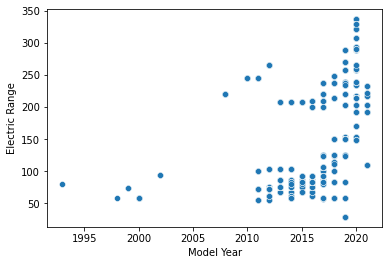

In [1161]:
sns.scatterplot(x="Model Year",y="Electric Range",data=df)

<AxesSubplot:xlabel='Model Year', ylabel='Electric Range'>

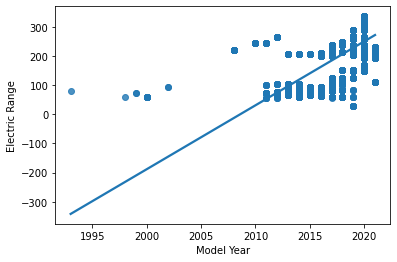

In [1162]:
sns.regplot(x="Model Year",y="Electric Range", ci=None,data=df)

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

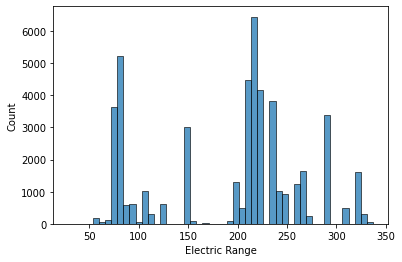

In [1163]:
sns.histplot(data = df , x ='Electric Range')

<AxesSubplot:>

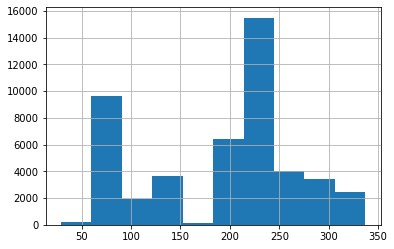

In [1164]:
df['Electric Range'].hist()

In [1165]:
df.std()

Model Year         2.393801
Electric Range    74.094612
dtype: float64

In [1166]:
# grouping dataset by model year
gp = df.groupby('Model Year')
gp

In [1167]:
y_2019 = (gp.get_group(2019)['Electric Range']).reset_index(drop=True)
len(y_2019)

# y_2019 = (y_2019 - y_2019.min())/ (y_2019.max() - y_2019.min())

8648

In [1168]:
y_2019

0       125
1       220
2       289
3       238
4       220
       ... 
8643    238
8644    150
8645    220
8646    150
8647    234
Name: Electric Range, Length: 8648, dtype: int64

In [1169]:
# tr_2019 = y_2019.transform([np.sqrt, np.exp, np.log, np.reciprocal])
# tr_2019.hist()

In [1170]:
# fig = sm.qqplot(tr_2019['exp'], line='45')
# plt.show()

In [1171]:
y_2020 = (gp.get_group(2020)['Electric Range']).reset_index(drop=True)
len(y_2020)
#717
# len(y_2020.iloc[:])
y_2020

0       322
1       259
2       291
3       293
4       322
       ... 
9360    266
9361    291
9362    322
9363    149
9364    330
Name: Electric Range, Length: 9365, dtype: int64

In [1174]:
from scipy.stats import shapiro

shapiro(y_2019)

ShapiroResult(statistic=0.8439143300056458, pvalue=0.0)

In [1175]:
shapiro(y_2020)

ShapiroResult(statistic=0.8551239371299744, pvalue=0.0)

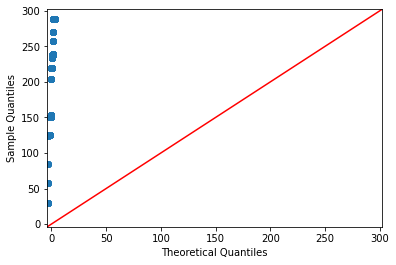

In [1176]:
fig = sm.qqplot(y_2019, line='45')
plt.show()

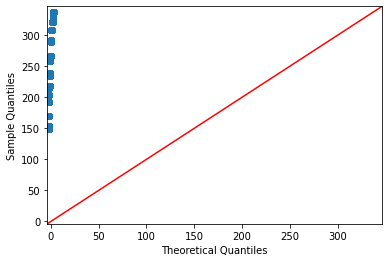

In [1177]:
fig = sm.qqplot(y_2020, line='45')
plt.show()

In [1185]:
y_2019.mean(), y_2019.median()

(209.41269657724328, 220.0)

In [1186]:
y_2020.mean(), y_2020.median()

(279.486492258409, 291.0)

In [1187]:
res, pval = stats.mannwhitneyu(y_2019, y_2020, alternative='two-sided')

if pval < 0.05:
    print('P-value < 0.05')
    print("Reject The Null Hypothesis")
else:
    print('P-value > 0.05')
    print("Reject The Alternate Hypothesis")


P-value < 0.05
Reject The Null Hypothesis


In [1119]:
# stats.wilcoxon(y_2019, y_2020)

In [1121]:
# z, pval=ztest(y_2019, y_2020, value=0)
# float(pval)

reference

GeeksforGeeks. (2021, June 28). Python | Pandas dataframe.groupby(). Retrieved August 17, 2022, from <br>
<span style="margin-left:2em">https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/</span>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://www.statology.org/z-test-python/